In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [38]:
df=pd.read_csv('dpe-tertiaire.csv')

/tmp/ipykernel_27247/1864393876.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('dpe-tertiaire.csv')


In [39]:
df2=pd.read_csv("dpe-v2-tertiaire-2.csv")

In [40]:

from pyproj import Transformer

# Définir les systèmes de projection
lambert93 = "EPSG:2154"  # Lambert 93 (France)
wgs84 = "EPSG:4326"      # WGS 84 (Latitude/Longitude)

# Créer le transformateur
transformer = Transformer.from_crs(lambert93, wgs84, always_xy=True)

# Fonction qui transforme simultanément les coordonnées X et Y en longitude et latitude
def convert_xy(row):
    x = row['Coordonnée_cartographique_X_(BAN)']
    y = row['Coordonnée_cartographique_Y_(BAN)']
    lon, lat = transformer.transform(x, y)  # transformation simultanée
    return pd.Series({'longitude': lon, 'latitude': lat})

# Appliquer la transformation sur chaque ligne de df2
df2[['longitude', 'latitude']] = df2.apply(convert_xy, axis=1)

# Vérification rapide des résultats
print(df2[['Coordonnée_cartographique_X_(BAN)', 'Coordonnée_cartographique_Y_(BAN)', 'longitude', 'latitude']].head())


   Coordonnée_cartographique_X_(BAN)  Coordonnée_cartographique_Y_(BAN)  \
0                          712942.36                         6516058.35   
1                          828010.81                         6499110.54   
2                         1012776.32                         6860453.93   
3                          923354.37                         6303377.93   
4                          617387.30                         6930052.21   

   longitude   latitude  
0   3.166455  45.743998  
1   4.641613  45.579526  
2   7.257632  48.768276  
3   5.775299  43.794088  
4   1.860749  49.464506  


In [41]:
import pandas as pd


mapping = {
    "N°DPE": "numero_dpe",
    "Date_réception_DPE": "date_reception_dpe",
    "Date_établissement_DPE": "date_etablissement_dpe",
    "Date_visite_diagnostiqueur": "date_visite_diagnostiqueur",
    "Version_DPE": "version_methode_dpe",
    "Méthode_du_DPE": "nom_methode_dpe",
    "Etiquette_DPE": "classe_consommation_energie",
    "Etiquette_GES": "classe_estimation_ges",
    "Conso_kWhep/m²/an": "consommation_energie",
    "Emission_GES_kgCO2/m²/an": "estimation_ges",
    "Année_construction": "annee_construction",
    "Catégorie_ERP": "tr012_categorie_erp_id",
    "Secteur_activité": "secteur_activite",
    "Surface_(SHON)": "shon",
    "Surface_utile": "surface_habitable",
    "Adresse_brute": "geo_adresse",
    "Code_INSEE_(BAN)": "code_insee_commune",
    "N°_voie_(BAN)": "numero_rue",
    "Identifiant__BAN": "geo_id",
    "Score_BAN": "geo_score",
    "Nom__rue_(BAN)": "nom_rue",
    "Code_postal_(brut)": "code_postal",  # à convertir ensuite en int
    "N°_étage_appartement": "etage",
    "Complément_d'adresse_bâtiment": "batiment",
    "Cage_d'escalier": "escalier",
    "Nom__commune_(Brut)": "commune",
    "N°_département_(BAN)": "tv016_departement_code"
}


df2_renamed = df2.rename(columns=mapping)


print("Colonnes de df2 renommé :", df2_renamed.columns.tolist())
print("Colonnes de df :", df.columns.tolist())


common_cols = df2_renamed.columns.intersection(df.columns)
print("Colonnes communes :", common_cols.tolist())


df3 = pd.concat([df[common_cols], df2_renamed[common_cols]], axis=0, ignore_index=True)


df3.columns


Colonnes de df2 renommé : ['numero_dpe', 'date_reception_dpe', 'date_etablissement_dpe', 'date_visite_diagnostiqueur', 'Modèle_DPE', 'N°_DPE_remplacé', 'Date_fin_validité_DPE', 'version_methode_dpe', 'N°_DPE_immeuble_associé', 'nom_methode_dpe', 'N°_immatriculation_copropriété', 'Invariant_fiscal_logement', 'classe_consommation_energie', 'classe_estimation_ges', 'consommation_energie', 'estimation_ges', 'annee_construction', 'tr012_categorie_erp_id', 'Période_construction', 'secteur_activite', 'Nombre_occupant', 'shon', 'surface_habitable', 'Type_énergie_principale_chauffage', 'geo_adresse', 'Nom__commune_(BAN)', 'code_insee_commune', 'numero_rue', 'geo_id', 'Adresse_(BAN)', 'Code_postal_(BAN)', 'geo_score', 'nom_rue', 'Coordonnée_cartographique_X_(BAN)', 'Coordonnée_cartographique_Y_(BAN)', 'code_postal', 'etage', 'Nom_résidence', 'batiment', 'escalier', "Complément_d'adresse_logement", 'Statut_géocodage', 'commune', 'tv016_departement_code', 'N°_région_(BAN)', 'Conso_é_finale_énergie

Index(['numero_dpe', 'date_reception_dpe', 'date_etablissement_dpe',
       'date_visite_diagnostiqueur', 'version_methode_dpe', 'nom_methode_dpe',
       'classe_consommation_energie', 'classe_estimation_ges',
       'consommation_energie', 'estimation_ges', 'annee_construction',
       'tr012_categorie_erp_id', 'secteur_activite', 'shon',
       'surface_habitable', 'geo_adresse', 'code_insee_commune', 'numero_rue',
       'geo_id', 'geo_score', 'nom_rue', 'code_postal', 'etage', 'batiment',
       'escalier', 'commune', 'tv016_departement_code', 'longitude',
       'latitude'],
      dtype='object')

In [42]:
def clean_date_column(date_series):
    
    date_clean = date_series.astype(str).str.strip().str.split().str[0]
    dates = pd.to_datetime(date_clean, format='%Y-%m-%d', errors='raise')
  
    return dates.dt.strftime('%Y-%m-%d')

df3['date_reception_dpe'] = clean_date_column(df3['date_reception_dpe'])


In [43]:
mapping = {
    "Bureau, Administration, Enseignement": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "Commerce": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "Bureaux": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "bureaux": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "Centres Commerciaux": "Centre commercial",
    "Occupation continue (hôpitaux, hôtels, intern": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "Industrie": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    " Bureaux, administration, enseignement": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "enseignement": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "Local commercial": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "Artisanat": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "Magasin de vente": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "commerce": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "Restaurant": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "Structure d’accueil pour personnes âgées": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "COMMERCE": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "établissement de santé": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "administration": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "Autre bâtiment de culture et loisirs": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "salles de sport": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "Etablissements sanitaires : Hôpitaux et clini": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "bureaux, services administratifs, enseignemen": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "Local professionnel": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "Enseignement Primaire / Secondaire": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "Centre commercial": "Centre commercial",
    "LOCAL PROFESSIONNEL": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "Hôtel": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "Etablissements sociaux": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "Locaux sportifs": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "Local Commercial": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "Banque": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    " Bâtiment à occupation continue": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "Établissement de soins": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "Salle à usage multiple": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "restaurant": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "Restauration": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "Résidence tourisme": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "W : Administrations, banques, bureaux": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "U : Établissements de soins": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "M : Magasins de vente, centres commerciaux": "Centre commercial",
    "N : Restaurants et débits de boisson": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "J : Structures d’accueil pour personnes âgées ou personnes handicapées": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "R : Établissements d’éveil, d’enseignement, de formation, centres de vacances, centres de loisirs sans hébergement": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "T : Salles d'exposition à vocation commerciale": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "GHW : Bureaux": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "locaux d'entreprise (bureaux)": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "P : Salles de danse et salles de jeux": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "O : Hôtels et pensions de famille": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "X : Établissements sportifs couverts": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "L : Salles d'auditions, de conférences, de réunions, de spectacles ou à usage multiple": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "V : Établissements de divers cultes": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "OA : Hôtels-restaurants d'Altitude": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "Y : Musées": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "PA : Établissements de Plein Air": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "GHU : Usage sanitaire": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "S : Bibliothèques, centres de documentation": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "GA : Gares Accessibles au public (chemins de fer, téléphériques, remonte-pentes...)": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "GHO : Hôtel": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "GHS : Dépôt d'archives": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)"
}

# Application du mapping sur la colonne 'secteur_activite'
df3['asset_cre'] = df3['secteur_activite'].map(mapping)

# Optionnel : gérer les valeurs non mappées
df3['asset_cre'] = df3['asset_cre'].fillna('Autres')

print(df3.head())


      numero_dpe date_reception_dpe date_etablissement_dpe  \
0  1330V8000001A         2013-04-11             2013-04-11   
1  1356V4000001E         2013-04-15             2013-04-14   
2  1317V7000001E         2013-04-15             2013-04-11   
3  1369V4000001I         2013-04-15             2013-04-02   
4  1364V8000001H         2013-04-15             2013-04-15   

  date_visite_diagnostiqueur version_methode_dpe  nom_methode_dpe  \
0                 2013-04-10                 NaN  Méthode Facture   
1                 2013-04-12             facture          Facture   
2                 2013-04-11               V2012        3CL - DPE   
3                 2013-04-02         Version 1.3              3CL   
4                 2013-04-15                 NaN  Méthode Facture   

  classe_consommation_energie classe_estimation_ges  consommation_energie  \
0                           B                     A                 38.00   
1                           N                     N       

In [44]:
df3.dropna()

,numero_dpe,date_reception_dpe,date_etablissement_dpe,date_visite_diagnostiqueur,version_methode_dpe,nom_methode_dpe,classe_consommation_energie,classe_estimation_ges,consommation_energie,estimation_ges,...,nom_rue,code_postal,etage,batiment,escalier,commune,tv016_departement_code,longitude,latitude,asset_cre
2,1317V7000001E,2013-04-15,2013-04-11,2013-04-11,V2012,3CL - DPE,N,N,0.00,0.00,...,des Cloutiers,17000,Rez de chaussée,Sans objet,Sans objet,LA ROCHELLE,17,-1.148950,46.162162,"Autres cas (par exemple: théâtres, salles de s..."
6,1366V8000001J,2013-04-16,2013-04-16,2013-04-12,V2012,3CL - DPE,F,C,494.02,16.08,...,Maréchal Joffre,66740,RDC,/,Sans objet,SAINT-GÉNIS-DES-FONTAINES,66,2.919396,42.543421,"Autres cas (par exemple: théâtres, salles de s..."
17,1383V4000004H,2013-04-22,2013-04-22,2013-04-22,V2012,3CL - DPE,C,B,188.92,6.15,...,Traverse Joseph Farnous,83160,Rez de chaussée,B,\N,La Valette-du-Var,83,5.982194,43.136771,"Bâtiment à usage principale de bureau, d'admin..."
18,1343V7000001D,2013-04-22,2013-04-18,2013-04-18,V2012,3CL - DPE,E,E,307.18,56.31,...,Anatole France,43250,Rez de chaussée,\N,\N,SAINTE-FLORINE,43,3.305213,45.386814,"Autres cas (par exemple: théâtres, salles de s..."
21,1378V4000001I,2013-04-23,2013-04-23,2013-04-19,VERSION_2012,FACTURE,A,A,0.00,0.00,...,"32 et 34, rue au Pain",78100,\N,\N,\N,SAINT-GERMAIN-EN-LAYE,78,2.092611,48.896861,Autres
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731931,2517T0040163D,2025-01-07,2025-01-06,2025-01-05,2.4,dpe tertiaire facture dans un bâtiment de loge...,D,B,256.40,7.10,...,Place du General de Gaulle,17600,0.0,Sans objet,Sans objet,SAUJON,17,-0.923862,45.675508,Bâtiment à occupation continue (par exemple: h...
772858,2376T0920286F,2023-03-20,2023-03-19,2023-03-19,2.2,dpe tertiaire facture,E,D,299.20,35.00,...,Avenue de la République,76370,0.0,Sans objet,Sans objet,DIEPPE,76,1.102163,49.924929,"Autres cas (par exemple: théâtres, salles de s..."
789234,2376T1603943S,2023-05-15,2023-05-14,2023-05-01,2.3,dpe tertiaire facture dans un bâtiment de loge...,E,B,333.50,9.30,...,Rue Saint Vivien,76000,0.0,Sans objet,Sans objet,ROUEN,76,1.106006,49.442259,"Autres cas (par exemple: théâtres, salles de s..."
795400,2376T2341987A,2023-07-11,2023-07-10,2023-07-10,2.3,dpe tertiaire facture dans un bâtiment de loge...,C,B,156.20,4.30,...,Rue Saint Filleul,76000,0.0,Sans objet,Sans objet,ROUEN,76,1.071371,49.448960,Bâtiment à occupation continue (par exemple: h...


In [47]:
import pandas as pd

# Conversion des colonnes concernées
df3['estimation_ges'] = pd.to_numeric(df3['estimation_ges'], errors='coerce')
df3['surface_habitable'] = pd.to_numeric(df3['surface_habitable'], errors='coerce')
df3['date_visite_diagnostiqueur'] = pd.to_datetime(df3['date_visite_diagnostiqueur'], errors='coerce')

# Définition de la fonction pour la moyenne pondérée
def weighted_avg(x):
    valid = x.dropna(subset=['estimation_ges', 'surface_habitable'])
    # Exclure les lignes où estimation_ges est nul (0)
    valid = valid[valid['estimation_ges'] != 0]
    
    total_surface = valid['surface_habitable'].sum()
    if total_surface != 0:
        return (valid['estimation_ges'] * valid['surface_habitable']).sum() / total_surface
    return None

# --- Agrégation par année ---
df3['year'] = df3['date_visite_diagnostiqueur'].dt.year
aggregation_year = df3.groupby(['asset_cre', 'year']).apply(weighted_avg).reset_index(name='weighted_estimation_ges_year')
print("Agrégation par année")
print(aggregation_year.head())

# --- Agrégation par mois ---
df3['month'] = df3['date_visite_diagnostiqueur'].dt.to_period('M')
aggregation_month = df3.groupby(['asset_cre', 'month']).apply(weighted_avg).reset_index(name='weighted_estimation_ges_month')
print("Agrégation par mois")
print(aggregation_month.head())

# --- Agrégation par jour ---
df3['day'] = df3['date_visite_diagnostiqueur'].dt.date
aggregation_day = df3.groupby(['asset_cre', 'day']).apply(weighted_avg).reset_index(name='weighted_estimation_ges_day')
print("Agrégation par jour")
print(aggregation_day.head())



/tmp/ipykernel_27247/1304129268.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregation_year = df3.groupby(['asset_cre', 'year']).apply(weighted_avg).reset_index(name='weighted_estimation_ges_year')


Agrégation par année
  asset_cre    year  weighted_estimation_ges_year
0    Autres  1899.0                     20.640000
1    Autres  1957.0                           NaN
2    Autres  1958.0                           NaN
3    Autres  2000.0                     16.133088
4    Autres  2001.0                      3.860000


/tmp/ipykernel_27247/1304129268.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregation_month = df3.groupby(['asset_cre', 'month']).apply(weighted_avg).reset_index(name='weighted_estimation_ges_month')


Agrégation par mois
  asset_cre    month  weighted_estimation_ges_month
0    Autres  1899-12                      20.640000
1    Autres  1957-12                            NaN
2    Autres  1958-12                            NaN
3    Autres  2000-01                      11.423628
4    Autres  2000-02                            NaN
Agrégation par jour
  asset_cre         day  weighted_estimation_ges_day
0    Autres  1899-12-30                        20.64
1    Autres  1957-12-07                          NaN
2    Autres  1958-12-09                          NaN
3    Autres  2000-01-01                        36.45
4    Autres  2000-01-10                          NaN


/tmp/ipykernel_27247/1304129268.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregation_day = df3.groupby(['asset_cre', 'day']).apply(weighted_avg).reset_index(name='weighted_estimation_ges_day')


In [48]:
L=['numero_dpe','date_reception_dpe','date_etablissement_dpe','version_methode_dpe','classe_consommation_energie','secteur_activite','code_insee_commune','numero_rue','nom_rue','code_postal','batiment','escalier','geo_adresse','geo_id','commune','etage','escalier','nom_methode_dpe','tr012_categorie_erp_id']

In [49]:
def drop_columns(df, columns, inplace=False):
    """
    Supprime une liste de colonnes d'un DataFrame.

    Paramètres :
        df (pd.DataFrame) : Le DataFrame à modifier.
        columns (list) : La liste des noms de colonnes à supprimer.
        inplace (bool) : Si True, modifie df directement. Par défaut, retourne une copie modifiée.

    Retourne :
        pd.DataFrame ou None : Le DataFrame modifié si inplace est False, sinon None.
    """
    # Vérifier que 'columns' est bien une liste
    if not isinstance(columns, list):
        raise ValueError("Les colonnes doivent être passées sous forme de liste.")

    # Supprimer les colonnes
    df_dropped = df.drop(columns=columns, inplace=inplace)
    
    if not inplace:
        return df_dropped

# Exemple d'utilisation :
# Pour créer un nouveau DataFrame sans les colonnes 'col1' et 'col2'
df3_new = drop_columns(df3, L)
# Pour modifier df3 directement :



In [50]:
df3_new.columns

Index(['date_visite_diagnostiqueur', 'classe_estimation_ges',
       'consommation_energie', 'estimation_ges', 'annee_construction', 'shon',
       'surface_habitable', 'geo_score', 'tv016_departement_code', 'longitude',
       'latitude', 'asset_cre', 'year', 'month', 'day'],
      dtype='object')

In [51]:
df3_new.dropna(inplace=True)

In [52]:
# Calcul de la moyenne par groupe asset_cre & month (pour les valeurs >= 0.5)
group_means = df3_new[df3_new['estimation_ges'] >= 0.5].groupby(['asset_cre', 'month'])['estimation_ges'].mean()

# Calcul de la moyenne par groupe asset_cre & year (pour les valeurs >= 0.5)
group_means_year = df3_new[df3_new['estimation_ges'] >= 0.5].groupby(['asset_cre', 'year'])['estimation_ges'].mean()

# Création d'un masque pour identifier les lignes avec estimation_ges < 0.5
mask = df3_new['estimation_ges'] < 0.5

# Fonction de remplacement : d'abord par (asset_cre, month), sinon par (asset_cre, year)
def fill_value(row):
    try:
        # Essayer de récupérer la moyenne pour asset_cre et month
        return group_means.loc[(row['asset_cre'], row['month'])]
    except KeyError:
        try:
            # En cas d'absence, récupérer la moyenne pour asset_cre et year
            return group_means_year.loc[(row['asset_cre'], row['year'])]
        except KeyError:
            # Si aucun groupe n'est trouvé, conserver la valeur d'origine
            return row['estimation_ges']

# Appliquer la fonction aux lignes identifiées par le masque
df3_new.loc[mask, 'estimation_ges'] = df3_new.loc[mask].apply(fill_value, axis=1)





In [53]:
import pandas as pd

import pandas as pd

# 1. Filtrer les lignes où classe_estimation_ges n'est pas 'N'
df_non_n = df3_new[df3_new['classe_estimation_ges'] != 'N']

# 2. Calculer le mode pour chaque groupe (asset_cre, month)
# On compte les occurrences de chaque modalité
counts = df_non_n.groupby(['asset_cre', 'month', 'classe_estimation_ges']).size().reset_index(name='count')

# Pour chaque combinaison asset_cre et month, on sélectionne la modalité la plus fréquente
mode_rows = counts.loc[counts.groupby(['asset_cre', 'month'])['count'].idxmax()]

# Création d'un dictionnaire avec la clé (asset_cre, month) -> classe_estimation_ges majoritaire
mode_mapping = dict(zip(zip(mode_rows['asset_cre'], mode_rows['month']), mode_rows['classe_estimation_ges']))

# 3. Calculer le mode de secours pour asset_cre et year (si le mode par mois n'est pas disponible)
counts_year = df_non_n.groupby(['asset_cre', 'year', 'classe_estimation_ges']).size().reset_index(name='count')
mode_rows_year = counts_year.loc[counts_year.groupby(['asset_cre', 'year'])['count'].idxmax()]
mode_mapping_year = dict(zip(zip(mode_rows_year['asset_cre'], mode_rows_year['year']), mode_rows_year['classe_estimation_ges']))

# 4. Fonction de remplacement pour une ligne donnée
def fill_class(row):
    key_month = (row['asset_cre'], row['month'])
    key_year = (row['asset_cre'], row['year'])
    if key_month in mode_mapping:
        return mode_mapping[key_month]
    elif key_year in mode_mapping_year:
        return mode_mapping_year[key_year]
    else:
        # En dernier recours, on conserve la valeur d'origine (qui est 'N')
        return row['classe_estimation_ges']

# 5. Identifier les lignes où classe_estimation_ges vaut 'N'
mask = df3_new['classe_estimation_ges'] == 'N'

# 6. Appliquer le remplacement
df3_new.loc[mask, 'classe_estimation_ges'] = df3_new.loc[mask].apply(fill_class, axis=1)

# Vérification rapide
print(df3_new[['asset_cre', 'month', 'year', 'classe_estimation_ges']].head(20))




                                            asset_cre    month    year  \
2   Autres cas (par exemple: théâtres, salles de s...  2013-04  2013.0   
5   Autres cas (par exemple: théâtres, salles de s...  2013-04  2013.0   
6   Autres cas (par exemple: théâtres, salles de s...  2013-04  2013.0   
17  Bâtiment à usage principale de bureau, d'admin...  2013-04  2013.0   
18  Autres cas (par exemple: théâtres, salles de s...  2013-04  2013.0   
21                                             Autres  2013-04  2013.0   
22                                  Centre commercial  2013-04  2013.0   
23  Bâtiment à usage principale de bureau, d'admin...  2013-04  2013.0   
24  Bâtiment à usage principale de bureau, d'admin...  2013-04  2013.0   
25                                             Autres  2013-04  2013.0   
26  Autres cas (par exemple: théâtres, salles de s...  2013-04  2013.0   
32  Bâtiment à usage principale de bureau, d'admin...  2013-04  2013.0   
33  Bâtiment à usage principale de bur

In [54]:


# 1. Calculer la moyenne de 'estimation_ges' pour chaque catégorie de 'asset_cre'
asset_cre_target_mapping = df3_new.groupby('asset_cre')['estimation_ges'].mean().to_dict()

# 2. Créer une nouvelle colonne encodée
df3_new['asset_cre_target_encoded'] = df3_new['asset_cre'].map(asset_cre_target_mapping)

# 3. (Optionnel) Afficher le mapping
print("Mapping catégorie -> moyenne de 'estimation_ges' :")
for cat, val in asset_cre_target_mapping.items():
    print(f"{cat} : {val}")

# Vérification rapide
df3_new[['asset_cre', 'estimation_ges', 'asset_cre_target_encoded']].head()



Mapping catégorie -> moyenne de 'estimation_ges' :
Autres : 111.96126629913064
Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc) : 44.08984097170509
Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc) : 106.77077370644132
Bâtiment à usage principale de bureau, d'administration ou d'enseignement : 22.589707215221328
Centre commercial : 60.32181402771887


,asset_cre,estimation_ges,asset_cre_target_encoded
2,"Autres cas (par exemple: théâtres, salles de s...",36.507143,44.089841
5,"Autres cas (par exemple: théâtres, salles de s...",36.507143,44.089841
6,"Autres cas (par exemple: théâtres, salles de s...",16.080000,44.089841
17,"Bâtiment à usage principale de bureau, d'admin...",6.150000,22.589707
18,"Autres cas (par exemple: théâtres, salles de s...",56.310000,44.089841


In [55]:
# 1. Calculer la moyenne de 'estimation_ges' pour chaque classe_estimation_ges
classe_ges_target_mapping = df3_new.groupby('classe_estimation_ges')['estimation_ges'].mean().to_dict()

# 2. Créer une nouvelle colonne encodée
df3_new['classe_estimation_ges_target_encoded'] = df3_new['classe_estimation_ges'].map(classe_ges_target_mapping)

# 3. (Optionnel) Afficher le mapping
print("Mapping classe_estimation_ges -> moyenne de 'estimation_ges' :")
for classe, val in classe_ges_target_mapping.items():
    print(f"{classe} : {val}")

# Vérification rapide
df3_new[['classe_estimation_ges', 'estimation_ges', 'classe_estimation_ges_target_encoded']].head()


Mapping classe_estimation_ges -> moyenne de 'estimation_ges' :
A : 27.440202655381334
B : 26.473309787571843
C : 104.80414011992285
D : 38.18996955282466
E : 59.6102114638704
F : 84.194062984896
G : 1947.009971141469
H : 123.0
I : 250.42
N : 0.3333333333333333


,classe_estimation_ges,estimation_ges,classe_estimation_ges_target_encoded
2,C,36.507143,104.804140
5,C,36.507143,104.804140
6,C,16.080000,104.804140
17,B,6.150000,26.473310
18,E,56.310000,59.610211


/tmp/ipykernel_27247/4149911180.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette="viridis")  # barres horizontales


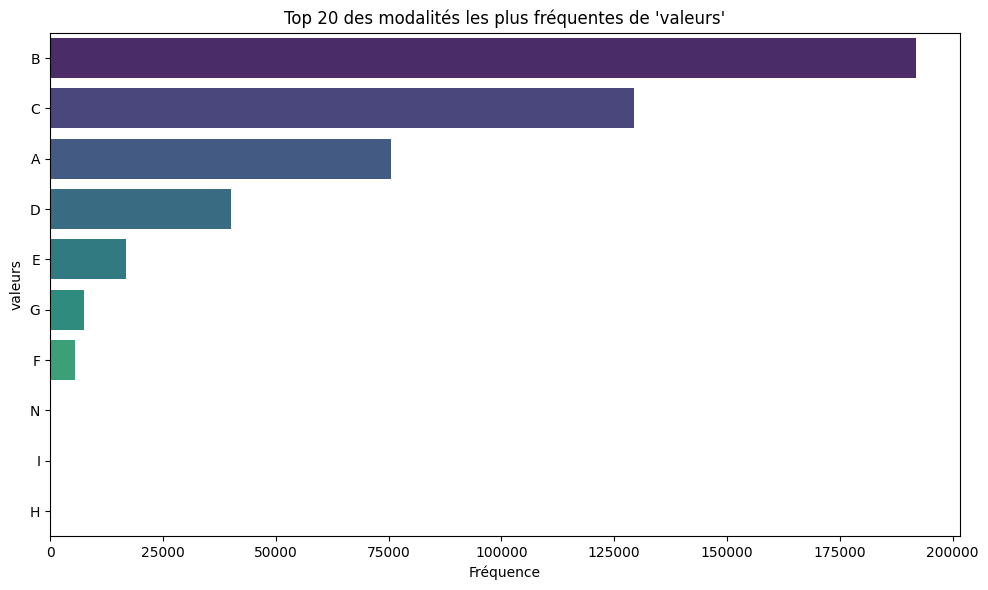

In [56]:

import seaborn as sns

# Sélectionner les 20 modalités les plus fréquentes
counts = df3_new['classe_estimation_ges'].value_counts().head(30)

plt.figure(figsize=(10, 6))
sns.barplot(x=counts.values, y=counts.index, palette="viridis")  # barres horizontales
plt.xlabel('Fréquence')
plt.ylabel('valeurs')
plt.title("Top 20 des modalités les plus fréquentes de 'valeurs'")
plt.tight_layout()
plt.show()



In [57]:
df3_new['estimation_ges']

2          36.507143
5          36.507143
6          16.080000
17          6.150000
18         56.310000
             ...    
881679      4.000000
881681     23.800000
881682      6.000000
881694    142.700000
881714      2.000000
Name: estimation_ges, Length: 466553, dtype: float64

In [58]:
df3_new.columns

Index(['date_visite_diagnostiqueur', 'classe_estimation_ges',
       'consommation_energie', 'estimation_ges', 'annee_construction', 'shon',
       'surface_habitable', 'geo_score', 'tv016_departement_code', 'longitude',
       'latitude', 'asset_cre', 'year', 'month', 'day',
       'asset_cre_target_encoded', 'classe_estimation_ges_target_encoded'],
      dtype='object')

In [59]:
df3_new.drop('asset_cre',axis=1,inplace=True)
df3_new.drop('classe_estimation_ges',axis=1,inplace=True)

In [60]:
df3_new.columns

Index(['date_visite_diagnostiqueur', 'consommation_energie', 'estimation_ges',
       'annee_construction', 'shon', 'surface_habitable', 'geo_score',
       'tv016_departement_code', 'longitude', 'latitude', 'year', 'month',
       'day', 'asset_cre_target_encoded',
       'classe_estimation_ges_target_encoded'],
      dtype='object')

In [ ]:
df3.to_csv("df3_export.csv", index=False)